# Curiculum Exercises - per Ryan complete his exercises in next cell

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load the tips dataset from either pydataset or seaborn.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)
The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model significantly better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

# Exercises from Ryan

Create a new notebook or Python script named evaluate.
Evaluating simple linear regressions on lemonade data with other features:
1. Create a dataframe from the csv at https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv
2. Make a baseline for predicting sales. (The mean is a good baseline)
3. Create a new dataframe to hold residuals.
4. Calculate the baseline residuals.
5. Use ols from statsmodels to create a simple linear regression (1 independent variable, 1 dependent variable) to predict sales using flyers.

`the df variable is lemonade data

model = ols('sales ~ flyers', data=df).fit()   
predictions = model.predict(df.x)`

1. Use the .predict method from ols to produce all of our predictions. Add these predictions to the data
2. Calculate that model's residuals.
3. Evaluate that model's performance and answer if the model is significant.
4. Evaluate that model's performance and answer if the feature is significant.

#### Repetition Improves Performance!
- In the next section of your notebook, perform the steps above with the rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the rainfall model over the flyers model?
- In the next section of your notebook, perform the steps above with the log_rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the log_rainfall model over the flyers model? Would you prefer the model built with log_rainfall over the rainfall model from before?
- In the next section of your notebook, perform the steps above with the temperature column as the model's only feature. Does this model beat the baseline? Would you prefer the rainfall, log_rainfall, or the flyers model?
- Which of these 4 single regression models would you want to move forward with?


#### Tips dataset
1. Load the tips dataset from pydataset or seaborn
2. Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.
3. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. Here is some sample code to get you started:
`from statsmodels.formula.api import ols
from pydataset import data

df = data("tips")

model = ols('tip ~ total_bill', data=df).fit()

predictions = model.predict(df.x)`

1. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
2. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).
3. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.
4. What is the amount of variance explained in your model?
5. Is your model significantly better than the baseline model?
6. Plot the residuals for the linear regression model that you made.

In [26]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

# Linear Model
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
#1. create dataframe
df = pd.read_clipboard(sep=',', index_col=0)

In [6]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
1/1/17,Sunday,27.0,2.00,15,0.5,10
1/2/17,Monday,28.9,1.33,15,0.5,13
1/3/17,Tuesday,34.5,1.33,27,0.5,15
1/4/17,Wednesday,44.1,1.05,28,0.5,17
1/5/17,Thursday,42.4,1.00,33,0.5,18


In [9]:
# 2. Make a baseline
baseline = df.Sales.mean()
baseline

25.323287671232876

In [10]:
# 3. create dataframe to hold baseline residuals
# 4. calculate baseline residuals
# evaluate = pd.DataFrame()

# evaluate["x"] = df.flyers

# # Our y is our dependent variable
# evaluate["y"] = df.sales
# evaluate["baseline"] = df.sales.mean()

# # y-hat is shorthand for "predicted y" values
# evaluate["yhat"] = model.predict()

# # Calculate the baseline residuals 
# # Residual is predicted minus actual
# evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# # Calculate the model residuals
# evaluate["model_residual"] = evaluate.yhat - evaluate.y

# evaluate.head(4)

eval1 = pd.DataFrame()
eval1['x_flyers'] = df.Flyers
eval1['y_sales'] = df.Sales
eval1['baseline'] = df.Sales.mean()
eval1['baseline_residual'] = eval1.baseline - eval1.y_sales

eval1.head()

,x_flyers,y_sales,baseline,baseline_residual
Date,,,,
1/1/17,15,10,25.323288,15.323288
1/2/17,15,13,25.323288,12.323288
1/3/17,27,15,25.323288,10.323288
1/4/17,28,17,25.323288,8.323288
1/5/17,33,18,25.323288,7.323288


In [15]:
# 5. 
# Pre-requisite Part 2 - build/identify a super simple linear model
# We'll use statsmodels OLS (ordinary least squares method here)

# The arguments to the ols function are the column names as strings, separated by ~
# ols("y ~ x") 
# ols("target ~ feature")

model1 = ols('Sales ~ Flyers', df).fit()


In [18]:
# 5.1 Use the .predict method from ols to produce all of our predictions.
# Add these predictions to the data

eval1["yhat1"] = model1.predict()

In [20]:
# 5.2 Calculate that model's residuals.

eval1["model1_residual"] = eval1.yhat1 - eval1.y_sales

In [21]:
# 5.3 Evaluate that model's performance and answer if the model is significant.
# Calculate if the model beats the baseline
# Square errors for 2 reasons
# 1. Squaring large numbers increases their magnitude (opposite for small)
# 2. Squaring removes negative residuals
baseline_sse = (eval1.baseline_residual**2).sum()
model1_sse = (eval1.model1_residual**2).sum()

if model1_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model1_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 6083.326244705024


In [28]:
# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)

# Or we could calculate this using sklearn's mean_squared_error function
mse1 = mean_squared_error(eval1.y_sales, eval1.yhat)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse1 = sqrt(mse1)

print("Model 1 evaluates flyers and sales")
print("SSE is", model1_sse, " which is the sum sf squared errors")
print("MSE is", mse1, " which is the average squared error")
print("RMSE is", rmse1, " which is the square root of the MSE")

Model 1 evaluates flyers and sales
SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


In [29]:
r2m1 = model1.rsquared
print('R-squared = ', round(r2m1,3))

f_pval1 = model1.f_pvalue
print("p-value for model significance = ", f_pval1)

R-squared =  0.648
p-value for model significance =  2.193718738113383e-84


In [30]:
f_pval1 < .05

True

In [22]:
# 5.4 Evaluate that model's performance and answer if the feature is significant.
# the model only has 1 feature so if the model is significant (and it is) then the feature is significant


#### In the next section of your notebook, perform the steps above with the rainfall column as the model's feature. 

#### Does this model beat the baseline? 

#### Would you prefer the rainfall model over the flyers model?


In [23]:
eval2 = pd.DataFrame()
eval2['x_flyers'] = df.Flyers
eval2['y_sales'] = df.Sales
eval2['baseline'] = df.Sales.mean()
eval2['baseline_residual'] = eval2.baseline - eval2.y_sales
model2 = ols('Sales ~ Rainfall', df).fit()
eval2["yhat2"] = model2.predict()
eval2["model2_residual"] = eval2.yhat2 - eval2.y_sales

eval2.head()

,x_flyers,y_sales,baseline,baseline_residual,yhat2,model2_residual
Date,,,,,,
1/1/17,15,10,25.323288,15.323288,-1.599602,-11.599602
1/2/17,15,13,25.323288,12.323288,13.773142,0.773142
1/3/17,27,15,25.323288,10.323288,13.773142,-1.226858
1/4/17,28,17,25.323288,8.323288,20.197573,3.197573
1/5/17,33,18,25.323288,7.323288,21.344793,3.344793


In [41]:
baseline_sse = (eval2.baseline_residual**2).sum()
model2_sse = (eval2.model2_residual**2).sum()

if model2_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model2_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 2998.2371310300655


In [42]:
mse2 = mean_squared_error(eval2.y_sales, eval2.yhat2)
rmse2 = sqrt(mse2)

print("Model 2 evaluates rainfall and sales")
print("SSE is", model2_sse, " which is the sum sf squared errors")
print("MSE is", mse2, " which is the average squared error")
print("RMSE is", rmse2, " which is the square root of the MSE")

Model 2 evaluates rainfall and sales
SSE is 2998.2371310300655  which is the sum sf squared errors
MSE is 8.21434830419196  which is the average squared error
RMSE is 2.866068440249109  which is the square root of the MSE


In [43]:
r2m2 = model2.rsquared
print('R-squared = ', round(r2m2,3))

f_pval2 = model2.f_pvalue
print("p-value for model significance = ", f_pval2)

R-squared =  0.827
p-value for model significance =  3.2988846597381e-140


In [34]:
f_pval2 < .05

True

In [36]:
# the rainfall model performs better than the flyers model, the SSE is almost half that of the flyers model

#### In the next section of your notebook, perform the steps above with the log_rainfall column as the model's feature. Does this model beat the baseline? 

#### Would you prefer the log_rainfall model over the flyers model? 

#### Would you prefer the model built with log_rainfall over the rainfall model from before?

In [38]:
# add the log rainfall column to the df
df["log_rainfall"] = np.log(df.Rainfall)

In [39]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,log_rainfall
Date,,,,,,,
1/1/17,Sunday,27.0,2.00,15,0.5,10,0.693147
1/2/17,Monday,28.9,1.33,15,0.5,13,0.285179
1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.285179
1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.048790
1/5/17,Thursday,42.4,1.00,33,0.5,18,0.000000


In [48]:
eval3 = pd.DataFrame()
eval3['x_flyers'] = df.Flyers
eval3['y_sales'] = df.Sales
eval3['baseline'] = df.Sales.mean()
eval3['baseline_residual'] = eval3.baseline - eval3.y_sales
model3 = ols('Sales ~ log_rainfall', df).fit()
eval3["yhat3"] = model3.predict()
eval3["model3_residual"] = eval3.yhat3 - eval3.y_sales

eval3.head()

,x_flyers,y_sales,baseline,baseline_residual,yhat3,model3_residual
Date,,,,,,
1/1/17,15,10,25.323288,15.323288,3.688573,-6.311427
1/2/17,15,13,25.323288,12.323288,13.198359,0.198359
1/3/17,27,15,25.323288,10.323288,13.198359,-1.801641
1/4/17,28,17,25.323288,8.323288,18.708608,1.708608
1/5/17,33,18,25.323288,7.323288,19.845912,1.845912


In [49]:
baseline_sse = (eval3.baseline_residual**2).sum()
model3_sse = (eval3.model3_residual**2).sum()

if model3_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model3_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 952.325347429345


In [50]:
mse3 = mean_squared_error(eval3.y_sales, eval3.yhat3)
rmse3 = sqrt(mse3)

print("Model 3 evaluates log_rainfall and sales")
print("SSE is", model3_sse, " which is the sum sf squared errors")
print("MSE is", mse3, " which is the average squared error")
print("RMSE is", rmse3, " which is the square root of the MSE")

Model 3 evaluates log_rainfall and sales
SSE is 952.325347429345  which is the sum sf squared errors
MSE is 2.609110540902315  which is the average squared error
RMSE is 1.6152741380033036  which is the square root of the MSE


In [59]:
r2m3 = model3.rsquared
print('R-squared = ', round(r2m3,3))

f_pval3 = model3.f_pvalue
print("p-value for model significance = ", f_pval3)

R-squared =  0.945
p-value for model significance =  1.2242624097795882e-230


In [57]:
f_pval3 < .05

True

In [51]:
# The log_rainfall performs better than the flyers model and better than Rainfall model.
# The SSE for the log_rainfall model is half that of the Rainfall model

#### In the next section of your notebook, perform the steps above with the temperature column as the model's only feature. 

#### Does this model beat the baseline? 

#### Would you prefer the rainfall, log_rainfall, or the flyers model?

In [53]:
eval4 = pd.DataFrame()
eval4['x_flyers'] = df.Flyers
eval4['y_sales'] = df.Sales
eval4['baseline'] = df.Sales.mean()
eval4['baseline_residual'] = eval4.baseline - eval4.y_sales
model4 = ols('Sales ~ Temperature', df).fit()
eval4["yhat4"] = model4.predict()
eval4["model4_residual"] = eval4.yhat4 - eval4.y_sales

eval4.head()

,x_flyers,y_sales,baseline,baseline_residual,yhat4,model4_residual
Date,,,,,,
1/1/17,15,10,25.323288,15.323288,11.112301,1.112301
1/2/17,15,13,25.323288,12.323288,11.912772,-1.087228
1/3/17,27,15,25.323288,10.323288,14.272055,-0.727945
1/4/17,28,17,25.323288,8.323288,18.316540,1.316540
1/5/17,33,18,25.323288,7.323288,17.600329,-0.399671


In [54]:
baseline_sse = (eval4.baseline_residual**2).sum()
model4_sse = (eval4.model4_residual**2).sum()

if model4_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model4_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 349.977815203168


In [55]:
mse4 = mean_squared_error(eval4.y_sales, eval4.yhat4)
rmse4 = sqrt(mse4)

print("Model 4 evaluates temperature and sales")
print("SSE is", model4_sse, " which is the sum sf squared errors")
print("MSE is", mse4, " which is the average squared error")
print("RMSE is", rmse4, " which is the square root of the MSE")

Model 4 evaluates temperature and sales
SSE is 349.977815203168  which is the sum sf squared errors
MSE is 0.9588433293237479  which is the average squared error
RMSE is 0.979205458177061  which is the square root of the MSE


In [58]:
r2m4 = model4.rsquared
print('R-squared = ', round(r2m4,3))

f_pval4 = model4.f_pvalue
print("p-value for model significance = ", f_pval4)

R-squared =  0.98
p-value for model significance =  1.492364042585725e-309


In [60]:
f_pval4 < .05

True

In [61]:
# This model has the best performance of all 4 models with the lowest SSE, MSE, RMSE, and p-value
# and the R-squared value is the closest to 1

### Tips dataset
1. Load the tips dataset from pydataset or seaborn
2. Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.
3. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. Here is some sample code to get you started:
`from statsmodels.formula.api import ols
from pydataset import data

df = data("tips")

model = ols('tip ~ total_bill', data=df).fit()

predictions = model.predict(df.x)`

1. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
2. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).
3. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.
4. What is the amount of variance explained in your model?
5. Is your model significantly better than the baseline model?
6. Plot the residuals for the linear regression model that you made.

In [62]:
df = data('tips')

In [64]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [71]:
# create model object
mo1 = ols('tip ~ total_bill', df).fit()
x = 'total_bill'
y = 'tip'


In [79]:
def make_evaldf(x, y, model_object, df):
    evaldf = pd.DataFrame()
    evaldf['x'] = df[x]
    evaldf['y'] = df[y]
    evaldf['baseline'] = df[y].mean()
    evaldf['baseline_residual'] = evaldf.baseline - evaldf.y
    evaldf["yhat"] = model_object.predict()
    evaldf["model_residual"] = evaldf.yhat - evaldf.y
    return evaldf


In [84]:
evaldf = make_evaldf(x, y, mo1, df)

In [90]:
evaldf.head()

,x,y,baseline,baseline_residual,yhat,model_residual
1,16.99,1.01,2.998279,1.988279,2.704636,1.694636
2,10.34,1.66,2.998279,1.338279,2.006223,0.346223
3,21.01,3.50,2.998279,-0.501721,3.126835,-0.373165
4,23.68,3.31,2.998279,-0.311721,3.407250,0.097250
5,24.59,3.61,2.998279,-0.611721,3.502822,-0.107178


In [92]:
def metrics(df, model_object):
    baseline_sse = (df.baseline_residual**2).sum()
    model_sse = (df.model_residual**2).sum()

    if model_sse < baseline_sse:
        print("Our model beats the baseline")
        print("It makes sense to evaluate this model more deeply.")
    else:
        print("Our baseline is better than the model.")

    print("Baseline SSE", baseline_sse)
    print("Model SSE", model4_sse)
    
    mse = mean_squared_error(df.y, df.yhat)
    rmse = sqrt(mse)

    print("MSE is", mse, " which is the average squared error")
    print("RMSE is", rmse, " which is the square root of the MSE")
    
    r2 = model_object.rsquared
    print('R-squared = ', round(r2m4,3))

    f_pval = model_object.f_pvalue
    print("p-value for model significance = ", f_pval)
    
    alpha = .05
    print(f'f_pval is less than {alpha} = {f_pval<alpha}')

In [93]:
metrics(evaldf, mo1)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 465.2124770491804
Model SSE 349.977815203168
MSE is 1.036019442011377  which is the average squared error
RMSE is 1.0178504025697377  which is the square root of the MSE
R-squared =  0.98
p-value for model significance =  6.692470646863376e-34
f_pval is less than 0.05 = True


In [94]:
# What is the amount of variance explained in your model?
# that is the r-squared value which is 0.98

In [95]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

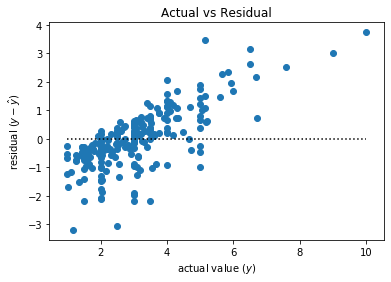

In [96]:
plot_residuals(evaldf.y, evaldf.yhat)